In [6]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
ROOT_DIR = os.path.abspath(os.path.join(Path().absolute(), os.pardir))
sys.path.insert(1, ROOT_DIR)
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from frequency_response import FrequencyResponse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def magnitude_response(x, fs):
    """Calculates frequency magnitude response
    Args:
        x: Audio data
        fs: Sampling rate
    Returns:
        - **f:** Frequencies
        - **X:** Magnitudes
    """
    _x = x
    nfft = len(_x)
    df = fs / nfft
    f = np.arange(0, fs - df, df)
    X = scipy.fftpack.fft(_x)
    X_mag = 20 * np.log10(np.abs(X))
    fr = FrequencyResponse(name='fr', frequency=f[0:int(np.ceil(nfft/2))], raw=X_mag[0:int(np.ceil(nfft/2))])
    #fr.interpolate()
    return fr

def read_wav(file_path, expand=False):
    """Reads WAV file
    Args:
        file_path: Path to WAV file as string
        expand: Expand dimensions of a single track recording to produce 2-D array?
    Returns:
        - sampling frequency as integer
        - wav data as numpy array with one row per track, samples in range -1..1
    """
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f'File in path "{os.path.abspath(file_path)}" does not exist.')
    data, fs = sf.read(file_path)
    if len(data.shape) > 1:
        # Soundfile has tracks on columns, we want them on rows
        data = np.transpose(data)
    elif expand:
        data = np.expand_dims(data, axis=0)
    return fs, data

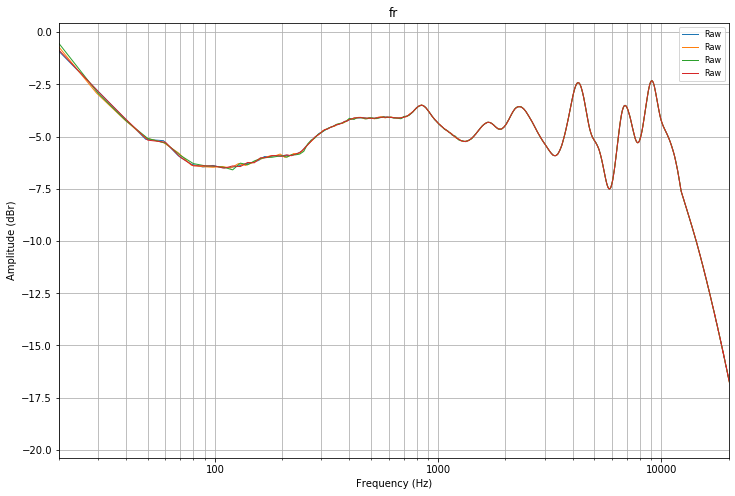

In [12]:
fig, ax = None, None
i = 0
for fp in Path(ROOT_DIR).glob('output/hd 600/*.wav'):
    fs, fir = read_wav(str(fp.resolve()))
    fr = magnitude_response(fir[0], fs)
    fig, ax = fr.plot_graph(fig=fig, ax=ax, raw_plot_kwargs={'color': f'C{i}'}, show=False)
    i += 1
plt.show()